# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [328]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [148]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [149]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [150]:
#Description
data.describe(include = 'all')

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870,2870.000000,2870.000000,2870,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
unique,NaN,5,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhattan,NaN,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1333,NaN,NaN,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26760.657143,NaN,40.731224,-73.950158,NaN,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,NaN,0.054942,0.049745,NaN,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,NaN,40.507080,-74.242850,NaN,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,NaN,40.692462,-73.984003,NaN,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,NaN,40.728250,-73.956720,NaN,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,NaN,40.762658,-73.934202,NaN,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000


The first step is data cleaning, which includes but not limited to:

    a. drop duplicates from data
    b. check for missing values, drop or impute as needed 
    c. encode categorical values

In [232]:
# dropping duplicates
data = data.drop_duplicates()
# check for missing values within each column
pd.DataFrame({'column_name': data.columns, 'precent_missing_data': data.isna().sum()*100/len(data)})

,column_name,precent_missing_data
id,id,0.000000
region,region,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
accommodation_type,accommodation_type,0.000000
cost,cost,0.000000
minimum_nights,minimum_nights,0.000000
number_of_reviews,number_of_reviews,0.000000
reviews_per_month,reviews_per_month,23.554007
owner_id,owner_id,0.000000


Since only reviews_per_month has 23% of data missing, given the nature of hotel reviews, when the number of reviews is missing, it is most likely caused by the absence of any reviews within the particular month. Hence, filling the missing values with 0.

In [329]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


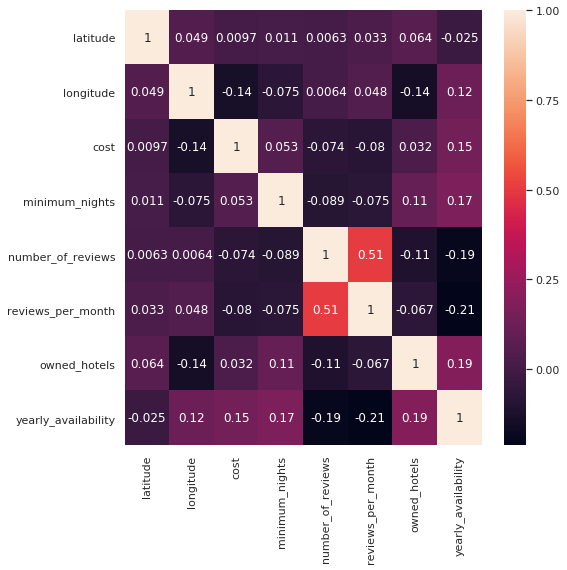

In [172]:
import seaborn as sns
temp = data.loc[:, ~data.columns.isin(['id', 'owner_id'])] # exclude the id columns for correlation plot
sns.set(rc = {'figure.figsize':(8, 8)})
sns.heatmap(temp.corr(), annot = True)

Based on the correlation plot, latitute and longtitude appear to have low correlations with the other factors, in fact, most of the variables seems to have relatively weak correlations with each other except for 'number_of_reviews' and 'reviews_per_month'. Hence, plotting a scatter matrix to further analyze.

Excluding latitude and longtitude from the matrix plot as well. The specific geographic coodinates of the hotel does not matter much when there exists a higher level reference 'region' in the data.

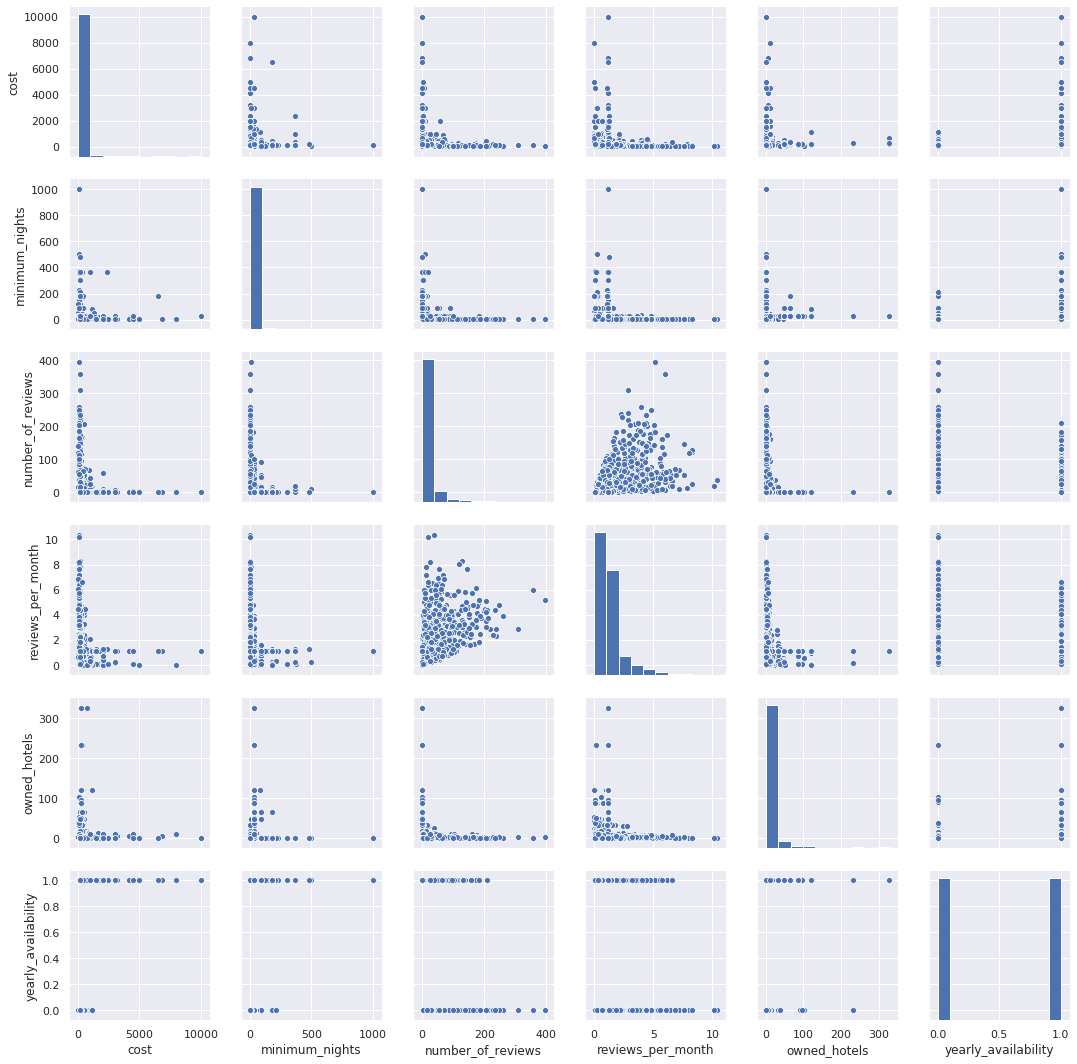

In [156]:
sns.pairplot(data.loc[:, ~data.columns.isin(['id', 'owner_id', 'latitude', 'longitude'])]) # excluding the selected columns for this matrix

According to the above correlation plot and matrix plots, the above conclusions can be drawn:
   1. Cost could be an influencing factor for yearly availability. High cost hotels appear to have a higher chance to have availabilities. This could be caused by affordability, that the majority of travellers can only afford or are more willing to pay for a lower priced hotel.
   2. Minimum nights could also be an influencing factor. Hotels that require a large number of minimum nights of stay tend to have slightly more yearly availabilities. This could be caused by the fact that the majority of travellers may only be looking for a short stay and only in special circumstances would an individual be looking to stay in a hotel in an extended period (i.e. holidays, relocations), and thus the demands for hotels that require long stays are lower.
   3. Number of reviews and review per month does not appear to be a strong influencing factor for yearly availability, however, there exists somewhat of an influence because hotels with very high numbers of reviews (200+) and reviews per month (6+) tend to have no availability. This may be caused by the fact that popular hotels tend to have lower availability in general, however, for low-to-mid level popular hotels, an individual usually sees a hotel as a temporary stay so they are more likely to overlook the reviews and popularity of the hotel when the hotel otherwise meets their financial and commute needs.
   4. The number of hotels the owner owns appear to be an influencing factor for yearly availability. This could be caused by the fact that owners that own more hotels are more likely to have strong financial abilities, and thus the hotels they own may be bigger and have more rooms available.

Based on the above conclusions, in this model, numeric columns 'cost', 'minimum_nights', 'owned_hotels' will be used to build the model.

Checking the relationship between categorial variables 'Region', 'Accommodation type' and yearly availability:

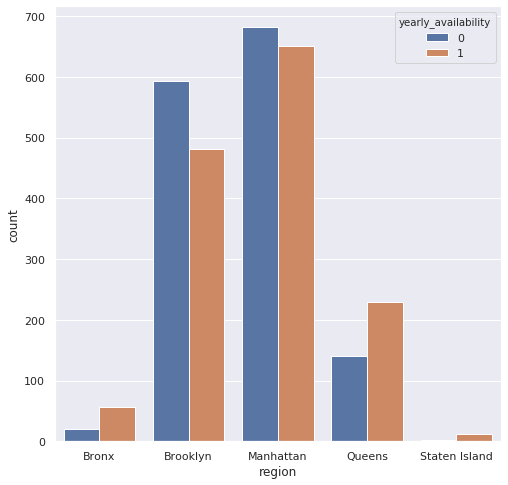

In [50]:
plot_temp = data.groupby(['region', 'yearly_availability']).size().to_frame('count')
sns.barplot(x = 'region', y = 'count', hue = 'yearly_availability', data = plot_temp.reset_index())

According to this visualization, region does not appear to have a strong inpact on yearly availability. Regions with high populations and regions with low populations seem to all experience similar availability statistics and thus the region factor will not be used in the model.

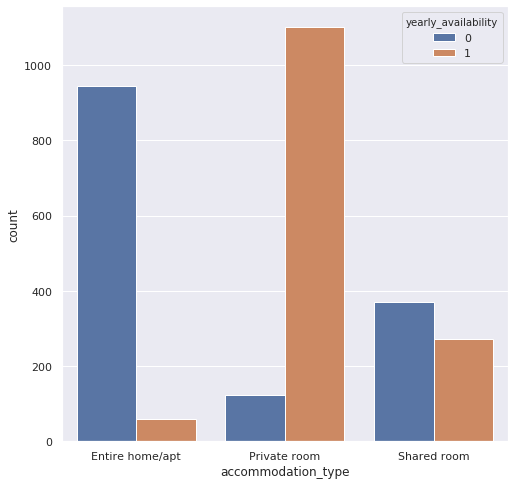

In [54]:
plot_temp = data.groupby(['accommodation_type', 'yearly_availability']).size().to_frame('count')
sns.barplot(x = 'accommodation_type', y = 'count', hue = 'yearly_availability', data = plot_temp.reset_index())

Based on the visualization, accommodation type could be an influencing factor on availability. Travellers appear to be more likely to book private rooms and less likely to book an entire home or apartment. Hence, this column will be encoded and included in the model.

In [330]:
# encoding accommodation_type column
encoded_accom = pd.get_dummies(data['accommodation_type'])
data = pd.merge(left = data, right = encoded_accom, left_index = True, right_index = True)
# dropping columns that are not included in model
drop_cols = ['region', 'latitude', 'longitude', 'owner_id', 'accommodation_type', 'number_of_reviews', 'reviews_per_month']
data = data.drop(drop_cols, axis = 1)
data.head()

,id,cost,minimum_nights,owned_hotels,yearly_availability,Entire home/apt,Private room,Shared room
0,13232,170,5,1,0,1,0,0
1,246,65,3,1,0,1,0,0
2,19091,85,1,1,1,0,1,0
3,34305,210,30,65,1,0,1,0
4,444,75,3,3,1,0,0,1


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [331]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


Before starting the modeling process, performing the same data cleaning processes on the test data as well.

In [188]:
# dropping duplicates
test_data = test_data.drop_duplicates()
# check for missing values within each column
pd.DataFrame({'column_name': test_data.columns, 'precent_missing_data': test_data.isna().sum()*100/len(test_data)})

,column_name,precent_missing_data
id,id,0.000000
region,region,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
accommodation_type,accommodation_type,0.000000
cost,cost,0.000000
minimum_nights,minimum_nights,0.000000
number_of_reviews,number_of_reviews,0.000000
reviews_per_month,reviews_per_month,24.094708
owner_id,owner_id,0.000000


In [332]:
test_data['reviews_per_month'] = test_data['reviews_per_month'].fillna(0)
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,0.00,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [333]:
# encoding accommodation_type column for test data as well
encoded_accom = pd.get_dummies(test_data['accommodation_type'])
test_data = pd.merge(left = test_data, right = encoded_accom, left_index = True, right_index = True)
# dropping columns
drop_cols = ['region', 'latitude', 'longitude', 'owner_id', 'accommodation_type', 'number_of_reviews', 'reviews_per_month']
test_data = test_data.drop(drop_cols, axis = 1)
test_data

,id,cost,minimum_nights,owned_hotels,Entire home/apt,Private room,Shared room
0,19215,135,2,1,0,0,1
1,36301,69,2,2,1,0,0
2,40566,225,30,12,0,1,0
3,33694,125,30,1,0,0,1
4,28873,43,1,2,1,0,0
...,...,...,...,...,...,...,...
713,26801,77,2,1,1,0,0
714,20110,145,3,1,1,0,0
715,31383,90,2,1,1,0,0
716,47135,200,30,23,0,1,0


Splitting the training and testing data, then train the model:

In [334]:
target = data['yearly_availability'] # set target variable

# drop id and target from train data
data = data.drop(['id', 'yearly_availability'], axis = 1)

# save and drop id from test data
test_id = test_data['id'] # save for future use
test_data = test_data.drop(['id'], axis = 1)

# model variables
X_train = data 
y_train = target
X_test = test_data

# scale the training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = data.columns)
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns = data.columns)


In [335]:
# building the model based on training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


<BarContainer object of 6 artists>

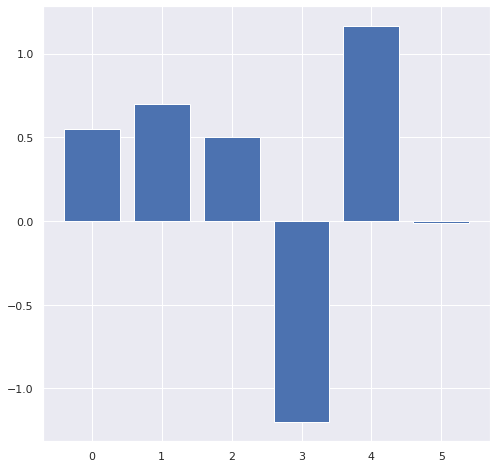

In [344]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len((model.coef_[0])))], model.coef_[0])

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [336]:
submission_df = pd.DataFrame({'id':test_id, 'yearly_availability':y_pred})
submission_df

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0
...,...,...
713,26801,0
714,20110,0
715,31383,0
716,47135,1


In [345]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---